In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Monte Carlo analizi, bir model içinde çok sayıda simülasyon çalıştırma ve her simülasyonun çıktılarına bakma fikrine dayanır. Ne kadar çok simülasyon çalıştırırsanız, modelinizin çıktılarının o kadar doğru olması muhtemeldir. Aslında central limit teoreme benzer diyebiliriz. Ne kadar çok simülasyon tekrar edersek gerçek ortalama değere yaklaşma şansımız o kadar artacaktır. Yani random sampling mantığına dayanır. Pi sayısını tahmin etmek için bir monte carla simülasyonu yapalım

##  Monte Carlo simulation that estimates Pi

#### Mantığım şu olucak. Dairenin alanının bir katsayıyla doğru orantılı olduğunu biliyorum (pi*r^2). Merkezi (0,0) olan bir birim çember düşünelim(r=1cm). Bu çemberin etrafına bir kare yerleştiriyorum. Karenin bir kenarı 2cm olmuş oluyor. Bu karenin içinde çok sayıda noktalar seçicem(N). Bu seçtiğim noktalardan çemberin içine düşenlerin sayısına da n diyorum.

#### Sonraki adım şu: Bu yolladığım noktalardan çemberin içine düşenler çemberin alanıyla orantılı ve karenin içine düşenler de karenin alanıyla orantılıdır.

#### O zaman şu denklemi yazabiliriz. n/N = Dairenin alanı / Karenin alanı
#### n/N = pi*r^2 / 4

In [15]:
noofDataPoints= 100000
#seçiceğim nokta sayısı

In [16]:
def my_function(x,y):
    return (x**2)+(y**2)
#seçilen noktanın merkezi(0,0) r=1 olan çembere olan uzaklığını hesaplıyorum.
#uzaklık 1 den büyük çıkarsa yarıçapı 1 olan çemberin dışına çıkmışım ama hala karenin içindeyim demektir

In [17]:
def check(a):
    if a <= 1:
        return 1
    else:
        return 0
#dairenin içindeysem 1 değilse 0

In [18]:
myNumbersX= np.random.uniform(low=-1, high=1, size=(noofDataPoints)) #x ekseninde [-1,1] arasında noofDataPoints kadar rastgele sayı seçiyorum
myNumbersY= np.random.uniform(low=-1, high=1, size=(noofDataPoints)) #y ekseninde [-1,1] arasında noofDataPoints kadar rastgele sayı seçiyorum

cc=pd.DataFrame(data=myNumbersX)
myDf= pd.concat([ pd.DataFrame(data=myNumbersX), pd.DataFrame(data=myNumbersY)], axis=1)
myDf.columns = ["x","y"] #bu sayıları dataframe'e aktarıyorum
myDf["x2+y2"] = myDf.apply(lambda row: my_function(row["x"], row["y"]), axis=1) #rastgele seçilen x ve y değerlerine karşılık gelicek şekilde çembere olan uzaklığını hesaplıyorum
myDf["Check"]= myDf.apply(lambda row: check(row["x2+y2"]), axis=1) # çemberin içinde mi dışında mı kontrol ediyorum.



In [19]:
myDf #data frame'in son hali
#check sütununda çemberin içindeki ve dışındaki noktaları görebiliyoruz.
#1 içinde(n), 0 dışında

,x,y,x2+y2,Check
0,0.162386,0.053090,0.029188,1
1,0.847230,-0.914050,1.553286,0
2,-0.963918,-0.404112,1.092444,0
3,0.571952,-0.085703,0.334474,1
4,-0.579446,-0.768083,0.925710,1
...,...,...,...,...
99995,0.004167,-0.087574,0.007686,1
99996,-0.721853,-0.975395,1.472468,0
99997,0.853891,-0.180194,0.761600,1
99998,0.541445,-0.888125,1.081928,0


In [20]:
4*sum(myDf["Check"])/noofDataPoints
#elimizde n,N,karenin alanı,r değerlerimiz var.En başta yazdığımız formülden pi sayısını çekiyoruz.
#seçtiğimiz random saple sayısı(noofDataPoints) ne kadar artarsa pi sayısını o kadar iyi estimate edebiliriz.

3.14284

In [24]:
def pi_estimator(sample_size): #fonksiyona çevirip değişen sample_size'a göre pi tahminimize bakalım
    
    def my_function(x,y):
        return (x**2)+(y**2)
    
    def check(a):
        if a <= 1:
            return 1
        else:
            return 0
    myNumbersX= np.random.uniform(low=-1, high=1, size=(sample_size)) 
    myNumbersY= np.random.uniform(low=-1, high=1, size=(sample_size)) 

    cc=pd.DataFrame(data=myNumbersX)
    myDf= pd.concat([ pd.DataFrame(data=myNumbersX), pd.DataFrame(data=myNumbersY)], axis=1)
    myDf.columns = ["x","y"] 
    myDf["x2+y2"] = myDf.apply(lambda row: my_function(row["x"], row["y"]), axis=1) 
    myDf["Check"]= myDf.apply(lambda row: check(row["x2+y2"]), axis=1)
    
    return (4*sum(myDf["Check"])/sample_size)

In [76]:
pi_estimates=[]
for i in range(1,30000,200):
    pi_estimates.append(pi_estimator(i))
#sample sayısını 30,000 e kadar 200 er arttıralım

In [77]:
pd.DataFrame(index=range(1,30000,200),data=pi_estimates)
#sample sayısı arttıkça 3.14 e daha çok yaklaşmaya başlıyor yaptığımız tahminlerimiz.

,0
1,4.000000
201,3.203980
401,3.271820
601,3.188020
801,3.210986
...,...
29001,3.145960
29201,3.159755
29401,3.141118
29601,3.131516


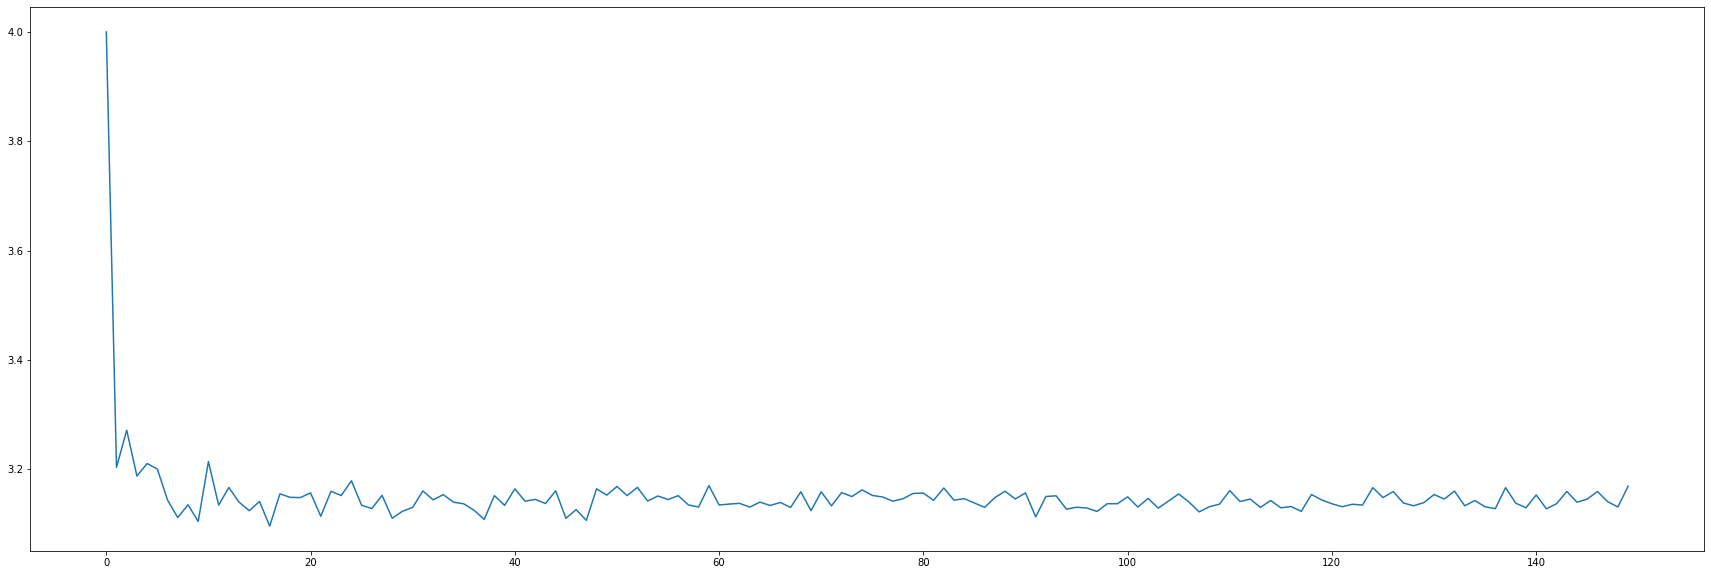

In [84]:
plt.figure(figsize=(30,10))
plt.plot(pi_estimates)
#grafikte bakarsak sample sayısı arttıkça 3.14 e yaklaştığı görülebilir
